In [51]:
# Langkah 1: Mengimpor library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing
from sklearn.svm import SVC  # Model Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score  # Matriks evaluasi
import matplotlib.pyplot as plt  # Untuk visualisasi

In [43]:
# 1. Mount Google Drive untuk mengakses file CSV
from google.colab import drive

# Melakukan mounting Google Drive agar dapat membaca file CSV yang tersimpan
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path = '/content/drive/MyDrive/Pembelajaran Mesin/MaterialStrength.csv'  # Ganti dengan path file Anda
data = pd.read_csv(file_path)  # Membaca file CSV menggunakan panda

In [65]:
# Langkah 1: Memeriksa apakah target kontinu
print("Contoh nilai target sebelum encoding:")
print(y.unique())  # Menampilkan nilai unik target

Contoh nilai target sebelum encoding:
[79.99 61.89 40.27 41.05 44.3  47.03 43.7  36.45 45.85 39.29 38.07 28.02
 43.01 42.33 47.81 52.91 39.36 56.14 40.56 42.62 41.84 28.24  8.06 44.21
 52.52 53.3  41.15 52.12 37.43 38.6  55.26 41.72 42.13 53.69 38.41 30.08
 37.72 42.23 36.25 50.46 39.   53.1  41.54 35.08 15.05 40.76 26.26 32.82
 39.78 46.93 33.12 49.19 14.59 14.64 41.93  9.13 50.95 33.02 54.38 51.73
  9.87 50.66 48.7  55.06 44.7  30.28 40.86 71.99 34.4  28.8  33.4  36.3
 29.   37.8  40.2  28.1  41.3  25.2  41.1  35.3  28.3  28.6  24.4  39.3
 40.6  24.1  46.2  42.8  49.2  46.8  45.7  55.6  54.9  34.9  46.9  54.1
 55.9  49.8  47.1  38.   56.1  59.09 22.9  35.1  61.09 59.8  60.29 61.8
 56.7  68.3  66.9  50.7  56.4  55.5  68.5  71.3  74.7  52.2  67.7  66.
 74.5  49.9  63.4  64.9  64.3  60.2  72.3  69.3  55.2  58.8  66.1  73.7
 77.3  80.2  72.99 71.7  79.4  59.89 66.6  65.2  66.7  62.5  74.19 70.7
 57.6  59.2  68.1  75.5  79.3  56.5  76.8  73.3  82.6  67.8  11.58 24.45
 24.89 29.45 40.71 10

In [66]:
# Langkah 2: Konversi target menjadi kategorikal (biner) jika perlu
# Misalnya, jika target adalah nilai kontinu, ubah menjadi kategori 0 dan 1 berdasarkan threshold
if y.dtype != 'int' and y.dtype != 'object':
    # Misalnya, gunakan median sebagai threshold untuk klasifikasi biner
    threshold = y.median()  # Threshold median
    y = (y > threshold).astype(int)  # Nilai di atas threshold menjadi 1, lainnya 0

In [67]:
# Langkah 3: Membagi data menjadi training dan testing ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Langkah 4: Melatih model SVM
svm_model = SVC(probability=True, random_state=42)  # Model SVM dengan probabilitas
svm_model.fit(X_train, y_train)  # Melatih model dengan data training

SVC(probability=True, random_state=42)

In [69]:
# Langkah 5: Evaluasi model
y_pred = svm_model.predict(X_test)  # Prediksi label untuk data testing
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilitas prediksi untuk kelas positif

In [70]:
# Evaluasi dan visualisasi seperti sebelumnya
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [71]:
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Akurasi: 0.78
Presisi: 0.82
Recall: 0.69
F1-Score: 0.75
AUC-ROC: 0.88


model menunjukkan performa yang baik dengan keseimbangan yang layak antara presisi dan recall, serta kemampuan tinggi dalam membedakan kelas positif dan negatif. Namun, nilai recall yang lebih rendah dibandingkan presisi menunjukkan bahwa model mungkin lebih sering melewatkan beberapa sampel positif, yang bisa menjadi perhatian tergantung pada konteks tugas klasifikasi.

In [72]:
# Menampilkan matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[137  22]
 [ 47 103]]


Hasil matriks kebingungan menunjukkan bagaimana model SVM memprediksi data uji. Dari matriks tersebut, dapat dilihat bahwa model berhasil memprediksi 137 sampel negatif dengan benar sebagai negatif (True Negatives) dan 103 sampel positif dengan benar sebagai positif (True Positives). Ini menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam mengenali sebagian besar sampel, baik yang termasuk dalam kelas negatif maupun positif.

Namun, terdapat beberapa kesalahan dalam prediksi. Model salah memprediksi 22 sampel negatif sebagai positif (False Positives), yang menunjukkan bahwa model terkadang terlalu "yakin" untuk mengklasifikasikan sampel negatif sebagai positif. Selain itu, model juga gagal mengenali 47 sampel positif yang diprediksi sebagai negatif (False Negatives). Kesalahan ini mengindikasikan bahwa model memiliki kelemahan dalam mendeteksi semua sampel positif dengan benar.

Dari perspektif keseluruhan, model memiliki lebih sedikit kesalahan False Positives dibandingkan False Negatives, yang dapat menjadi perhatian tergantung pada konteks tugas. Jika ini adalah masalah yang sensitif terhadap False Negatives (seperti deteksi penyakit), maka kesalahan ini menjadi lebih signifikan karena 47 sampel positif yang sebenarnya tidak terdeteksi oleh model. Sebaliknya, jika False Positives tidak menjadi masalah besar, maka model ini sudah cukup baik karena sebagian besar sampel positif berhasil dikenali dengan benar.

Secara keseluruhan, meskipun model menunjukkan performa yang baik dengan jumlah prediksi benar yang dominan, ada ruang untuk perbaikan dalam menangani False Negatives. Hal ini dapat ditingkatkan melalui penyesuaian threshold atau eksplorasi lebih lanjut pada metode balancing kelas jika dataset tidak seimbang.

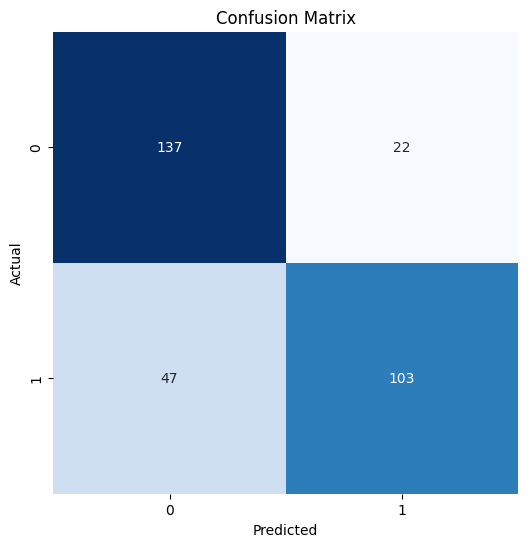

In [73]:
# Langkah 7: Visualisasi Matriks Kebingungan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


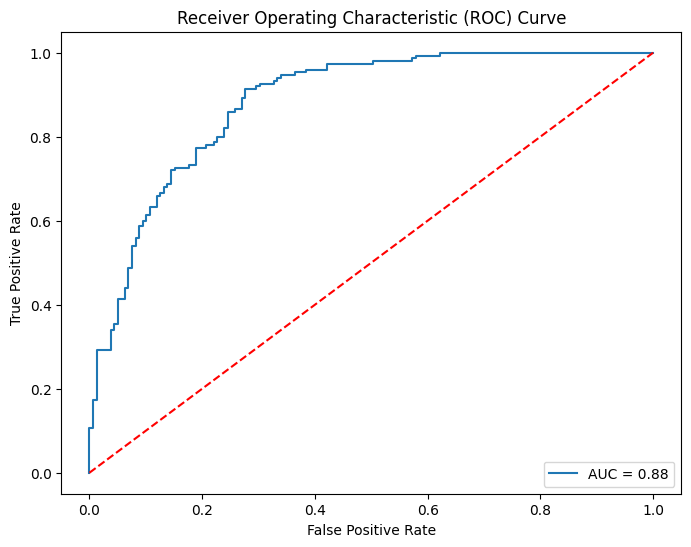

In [74]:
# Langkah 8: Visualisasi Kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Garis diagonal sebagai baseline
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Grafik yang ditampilkan adalah kurva ROC (Receiver Operating Characteristic), yang menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai threshold prediksi probabilitas. Kurva ROC digunakan untuk mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif.

Pada grafik, garis biru menunjukkan performa model berdasarkan perubahan threshold, sementara garis merah diagonal menunjukkan baseline dari model yang memprediksi secara acak (AUC = 0.5). Semakin jauh kurva dari garis diagonal, semakin baik kemampuan model dalam membedakan antara kelas.

Model ini memiliki area under the curve (AUC) sebesar 0.88, yang menunjukkan performa yang sangat baik. Nilai AUC yang tinggi ini mengindikasikan bahwa model memiliki kemampuan yang kuat untuk membedakan antara kelas positif dan negatif di berbagai threshold. Ini berarti model mampu memberikan probabilitas yang baik untuk memprioritaskan prediksi kelas positif (True Positives) tanpa meningkatkan False Positives secara signifikan.

Pada awal kurva (kiri bawah), model menunjukkan performa yang hampir sempurna dengan nilai FPR yang sangat rendah (sedikit False Positives) dan TPR yang tinggi. Namun, saat threshold diturunkan (menuju kanan atas), FPR meningkat karena model menjadi lebih permisif dalam memprediksi kelas positif. Meski demikian, performa tetap konsisten dengan kurva yang berada jauh di atas baseline, menunjukkan bahwa model lebih baik daripada tebakan acak.

Secara keseluruhan, kurva ROC dan nilai AUC yang ditampilkan menunjukkan bahwa model bekerja dengan baik dalam membedakan kelas positif dan negatif. Namun, jika False Positives atau False Negatives memiliki dampak yang berbeda dalam konteks aplikasi, threshold optimal mungkin perlu disesuaikan untuk memprioritaskan salah satu metrik tertentu, seperti presisi atau recall.

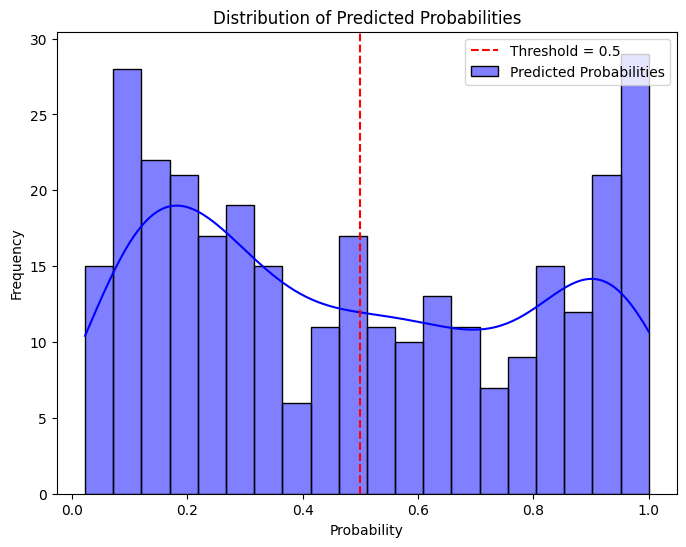

In [75]:
# Langkah 9: Visualisasi Distribusi Probabilitas Prediksi
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, bins=20, kde=True, color='blue', label='Predicted Probabilities')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()